# 目录
* FaceGrid范例  [点击跳转](#FaceGrid范例)
* [PairGrid(对图)范例 ](#PairGrid(对图)范例)
* [热度图](#热度图)
* [航班数据的汇总表](#航班数据的汇总表)

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
# seaborn中显示中文
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

In [85]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# <span id="FaceGrid范例"> FaceGrid范例</span>

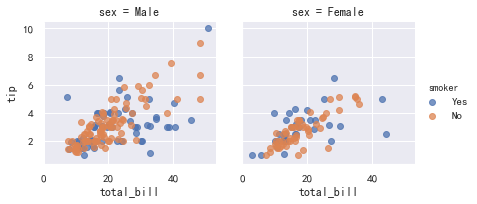

In [86]:
g = sns.FacetGrid(tips,col='sex',hue='smoker')
g.map(plt.scatter,'total_bill','tip',alpha=.75)
# g.map(plt.hist,'tip')
g.add_legend()

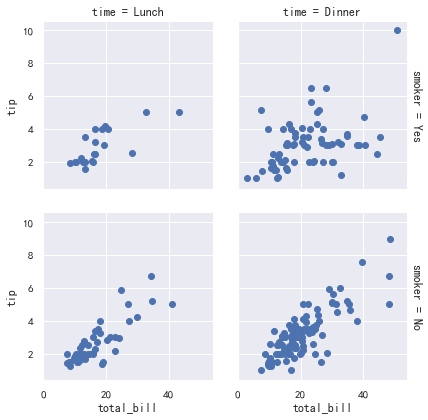

In [87]:
g= sns.FacetGrid(tips,row='smoker',col='time',margin_titles=True)
g.map(plt.scatter,'total_bill','tip')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


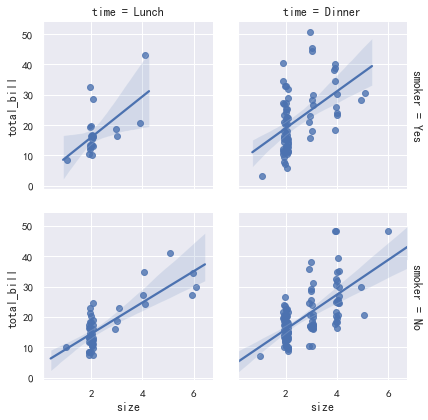

In [88]:
g = sns.FacetGrid(tips,row='smoker',col='time',margin_titles=True)
g.map(sns.regplot,'size','total_bill',fit_reg=True,x_jitter=0.1)

In [89]:
from pandas import Categorical
ordered_days = tips.day.value_counts().index
print(ordered_days)

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


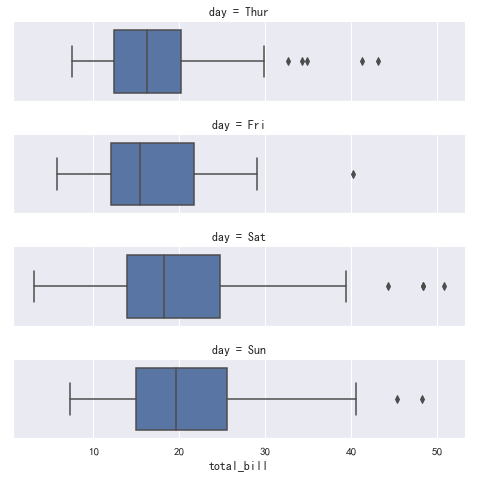

In [90]:
# 改变日期顺序
ordered_days = Categorical(['Thur','Fri','Sat','Sun'])
g = sns.FacetGrid(tips,row='day',row_order=ordered_days,size=1.7,aspect=4)
g.map(sns.boxplot,'total_bill')

#  设置颜色，线宽等

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


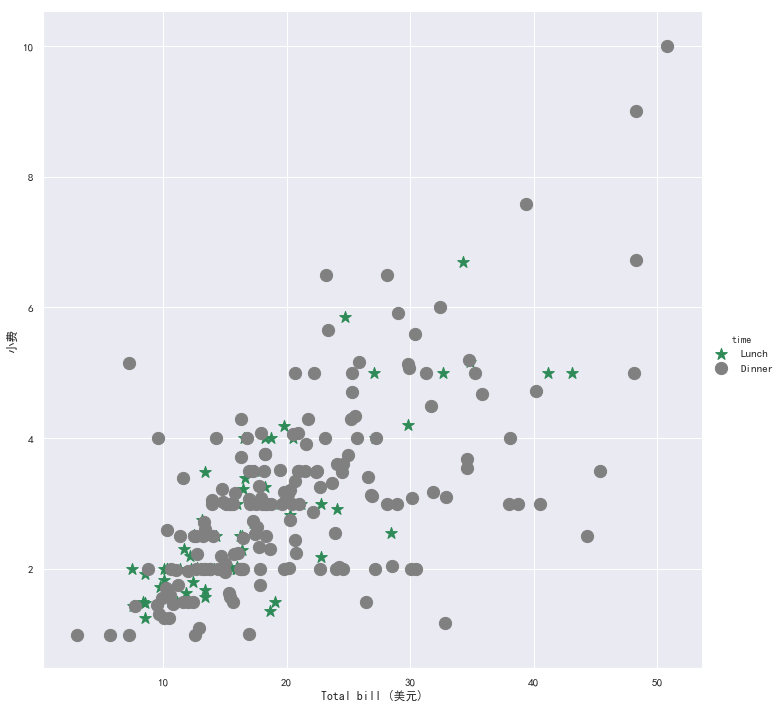

In [91]:
pal = dict(Lunch='seagreen',Dinner='gray')
g = sns.FacetGrid(tips,hue='time',palette=pal,size=10,hue_kws={'marker':['*','o']})
g.map(plt.scatter,'total_bill','tip',s=150)
g.set_axis_labels('Total bill (美元)','小费')
g.add_legend()

# 绘制对图<span id ='PairGrid(对图)范例'>

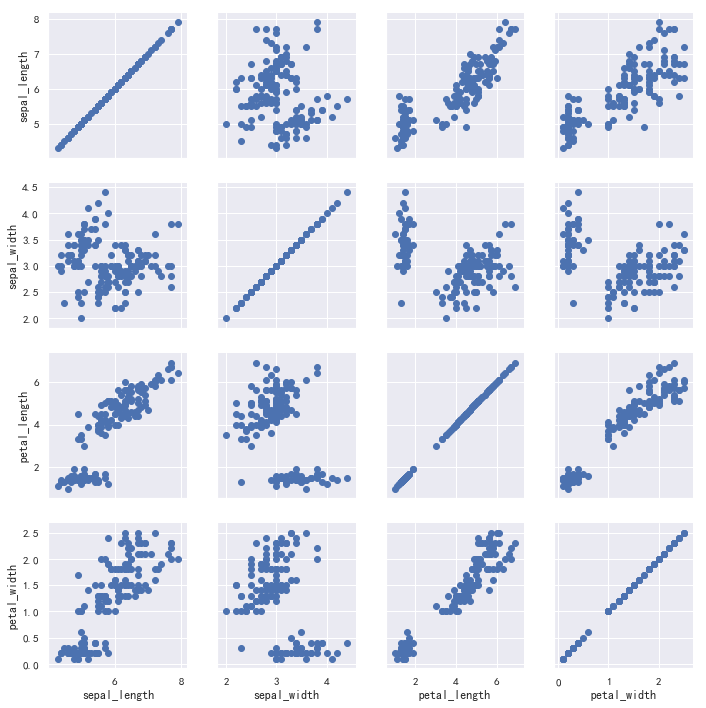

In [92]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris)
g.map(plt.scatter)

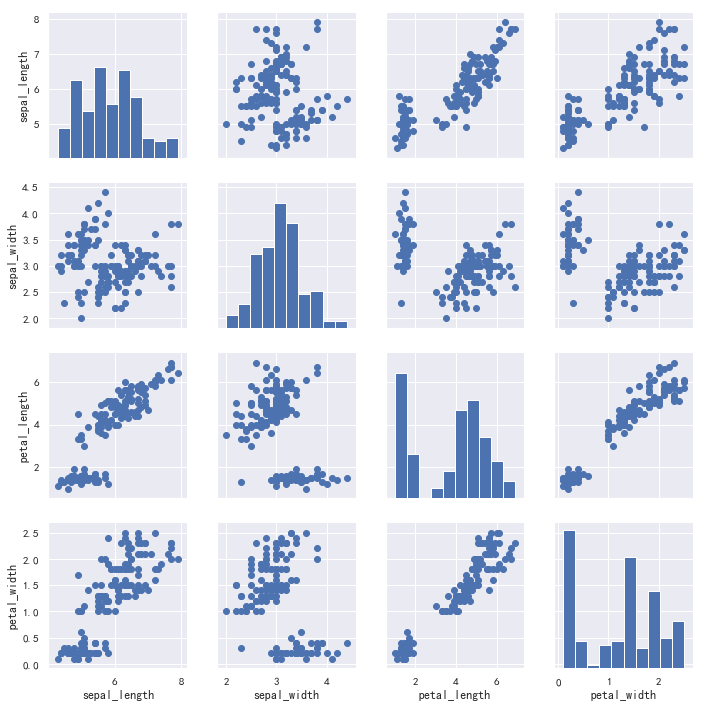

In [93]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

# 热度图<span id='热度图'>
    多用于显示不同特征之间的相关系数等

[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]]


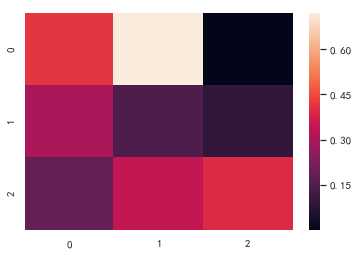

In [94]:
np.random.seed(1)
uniform_data = np.random.rand(3,3) # 矩阵形状的数据
print(uniform_data)
heatmap1 = sns.heatmap(uniform_data)

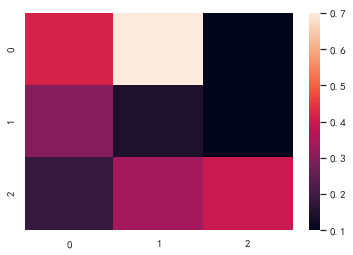

In [95]:
heatmap2 = sns.heatmap(uniform_data,vmin=0.1,vmax=0.7)

[[-2.3634686   1.13534535 -1.01701414]
 [ 0.63736181 -0.85990661  1.77260763]
 [-1.11036305  0.18121427  0.56434487]]


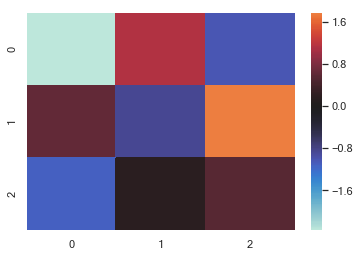

In [96]:
myfont=FontProperties(fname=r'C:\Windows\Fonts\micross.ttf',size=14)
sns.set(font=myfont.get_name())
normal_data = np.random.randn(3,3)
print(normal_data)
ax = sns.heatmap(normal_data,center=0)

# 航班数据的汇总表 <span id='航班数据的汇总表'>

In [97]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [98]:
flights = flights.pivot('month','year','passengers')
print(flights)

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237 

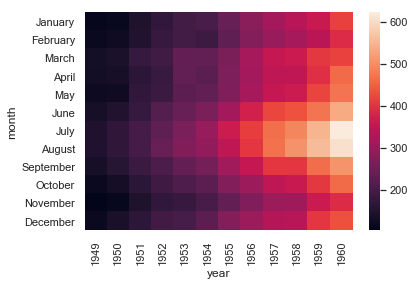

In [99]:
ax = sns.heatmap(flights)

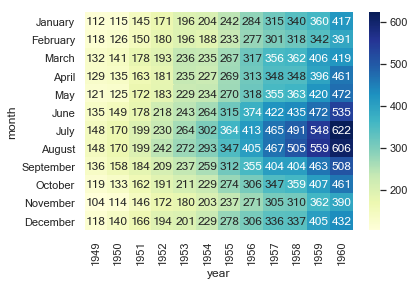

In [100]:
ax = sns.heatmap(flights,annot=True,fmt='d',cmap='YlGnBu')

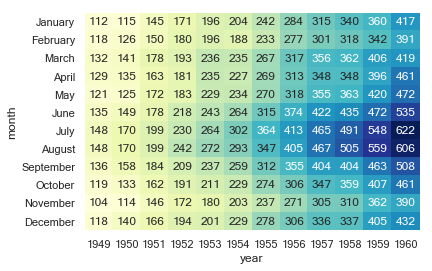

In [101]:
# 隐藏color bar
ax = sns.heatmap(flights,annot=True,fmt='d',cmap='YlGnBu',cbar=False)